In [150]:
import pandas as pd
import numpy as np

In [151]:
TrainUrl = "../titanic/train.csv"
TestUrl = "../titanic/test.csv"

In [152]:
TrainDf = pd.read_csv(TrainUrl)
TestDf = pd.read_csv(TestUrl)

In [129]:
t = TrainDf.drop("PassengerId",axis='columns')

KeyError: "['PassengerId'] not found in axis"

In [159]:
TrainAge = TrainDf["Age"].fillna(TrainDf["Age"].median())
TestAge = TestDf["Age"].fillna(TrainDf["Age"].median())

In [160]:
label = TrainDf.loc[:,["Survived"]].values

In [161]:
TrainAge = TrainAge.values.reshape(-1, 1)
label = label.reshape(-1,1)
TestAge = TestAge.values.reshape(-1,1)

In [162]:
TrainAge

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [163]:
lr_model = LogisticRegression()
lr_model.fit(TrainAge,label)

/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
p_pre = lr_model.predict(TestAge)
p_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [165]:
id_test = TestDf["PassengerId"]

In [166]:
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(p_pre, id_test, columns = ["Survived"])
# my_tree_one.csvとして書き出し
my_solution.to_csv("LRAM_noPreprocessing.csv", index_label = ["PassengerId"])

In [117]:
TrainDf['Gender'] =TrainDf['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [8]:
TrainDf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [134]:
TrainAgeMedian = TrainDf["Age"].fillna(TrainDf["Age"].median())
TrainDf["AgeMedia"] = TrainDf["Age"].fillna(TrainDf["Age"].median())

In [135]:
TrainAgeMean = TrainDf["Age"].fillna(TrainDf["Age"].mean())
TrainDf["AgeMedia"] = TrainDf["Age"].fillna(TrainDf["Age"].mean())

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [15]:
label = TrainDf.loc[:,["Survived"]].values

In [97]:
TrainAgeMedian = TrainDf["Age"].fillna(TrainDf["Age"].median())
TrainAgeMean = TrainDf["Age"].fillna(TrainDf["Age"].mean())
TestAgeMedian = TestDf["Age"].fillna(TestDf["Age"].median())
TestAgeMean = TestDf["Age"].fillna(TestDf["Age"].mean())

In [98]:
def Preprocessing(TrainAgeMedian):
    for i,age in enumerate(TrainAgeMedian):
        #print(age)
        if age < 10:
            TrainAgeMedian[i] = np.float64(0)
        elif age < 20:
            TrainAgeMedian[i] = np.float64(1)
        elif age < 30:
            TrainAgeMedian[i] = np.float64(2)
        elif age < 40:
            TrainAgeMedian[i] = np.float64(3)
        else:
            TrainAgeMedian[i] = np.float64(4)
    return TrainAgeMedian

In [99]:
TrainAgeMedian = Preprocessing(TrainAgeMedian)
TestAgeMedian =  Preprocessing(TestAgeMedian)

In [105]:
import sklearn.preprocessing as sp

In [106]:
enc = sp.OneHotEncoder( categories='auto', sparse=False )

In [107]:
TrainAgeMedian = enc.fit_transform(TrainAgeMedian)

In [168]:
type(TrainAgeMedian)

pandas.core.series.Series

In [109]:
TestAgeMedian = enc.fit_transform(TestAgeMedian)

In [110]:
TestAgeMedian

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [145]:
TrainDf.drop(["PassengerId",
             "Survived",
             "Pclass",
             "Name",
             "Sex",
             "SibSp",
             "Parch",
             "Ticket",
             "Fare",
             "Cabin",
             "Embarked"]
             ,axis='columns').head()

,Age,AgeMedia
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0


In [167]:
TrainDf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [111]:
TrainAgeMedian = TrainAgeMedian.values.reshape(-1, 1)
label = label.reshape(-1,1)
TestAgeMedian = TestAgeMedian.values.reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [112]:
lr_model = LogisticRegression()
lr_model.fit(TrainAgeMedian,label)

/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/e175751/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
p_pre = lr_model.predict(TestAgeMedian)
p_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [147]:
id_test = TestDf["PassengerId"]

In [148]:
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(p_pre, id_test, columns = ["Survived"])
# my_tree_one.csvとして書き出し
my_solution.to_csv("LogisticRegression_AgeMedian.csv", index_label = ["PassengerId"])

In [65]:
from sklearn.metrics import confusion_matrix
trueDf = pd.read_csv("../titanic/gender_submission.csv")
preDf = pd.read_csv("./LogisticRegression_AgeMedian.csv")

In [66]:
trueSurvived = trueDf["Survived"]
preSurvived = preDf["Survived"]
confusion_matrix(trueSurvived,preSurvived)

array([[266,   0],
       [152,   0]])

(array([  3.,  12.,  33., 112., 225., 262., 218.,  93.,  37.,   5.]),
 array([12.96668355, 19.78559694, 26.60451032, 33.42342371, 40.2423371 ,
        47.06125048, 53.88016387, 60.69907725, 67.51799064, 74.33690402,
        81.15581741]),
 <a list of 10 Patch objects>)

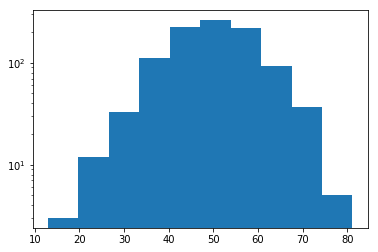

In [25]:
import numpy
import matplotlib.pyplot as plt
x = np.random.normal(50, 10, 1000)
 # ヒストグラムを出力
#plt.hist(x)
plt.hist(x, log=True)